# Testing the Loconav API

In [ ]:
# Connect to GIS
from arcgis.gis import GIS
gis = GIS('home')

In [ ]:
# Making Request to API
api_url = "https://api.vectronic-wildlife.com/v3/collar/40750/gps?collarkey=03A0B89F15512FC24BED4BBA79971DDF33781F908BC81B5C8DF43B297465FFD705216DA9B8D6A858104D8D3A014721E46A8CE04766A19DD1942D0F49C01909BFBFD0B4822744C87D12F780CF6E3438DF4AB59B9E039188C7536FA4FF7251468E1AB3DD5CF1BE5F45985676A2320DED3DAACEF68A0EC4D2900DDBDF660B60C9203E7681B87FF6046145FA65B62790C006705CFAD1F2A5EFF707DA18211C31C3B6AD5BCCE2E1F9B9F4E162AC3FCD9F4441D721A9950BBD709DCFEA2A449A5CD3B22BC9E1FF305021E2A0F914361BF6B5C5A7B05DA14B9E5FBB51B3DCC4FD7B777DA8574E5A1F70081277243302BEC2043B67651727671BE545EACECCE4A456479E"
import requests
response = requests.get(api_url)
data = response.json()

In [ ]:
#Preparing the dataframe
import pandas as pd
p_df_wwf = pd.DataFrame(data)
p_df_wwf_nan = p_df_wwf.dropna(subset=['longitude', 'latitude'])
p_df_wwf_nan.info()

In [ ]:
# Read data into a Spatially Enabled DataFrame
from arcgis.features import GeoAccessor, GeoSeriesAccessor
gdf_wwf = pd.DataFrame.spatial.from_xy(df=p_df_wwf, x_column='longitude', y_column='latitude', sr=4326)

In [ ]:
gdf_wwf.head()

In [ ]:
gdf_wwf1 = gdf_wwf.copy()
#Defining date ranges
conditions = [((gdf_wwf1['acquisitionTime']>= '2022-01-01') & (gdf_wwf1['acquisitionTime'] <= '2022-04-15')),
    ((gdf_wwf1['acquisitionTime']>= '2021-11-01') & (gdf_wwf1['acquisitionTime'] < '2022-01-01')),
    ((gdf_wwf1['acquisitionTime']>= '2021-08-01') & (gdf_wwf1['acquisitionTime'] <= '2021-10-31')),
    ((gdf_wwf1['acquisitionTime']>= '2021-05-01') & (gdf_wwf1['acquisitionTime'] <= '2021-07-31')),
    ((gdf_wwf1['acquisitionTime']>= '2021-02-01') & (gdf_wwf1['acquisitionTime'] <= '2021-04-30')),
    ((gdf_wwf1['acquisitionTime']>= '2020-11-01') & (gdf_wwf1['acquisitionTime'] <= '2021-01-31'))]

#Assigning flags (variable names) to the chosen date ranges
values = ['Between Jan22-Apr22', 'Between Nov21-Dec21', 'Between Aug21-Oct21', 'Between May21-Jul21','Between Feb21-Apr21','Between Nov20-Jan21']

#Using numpy.select() to create a list based on the conditions and values
import numpy as np
gdf_wwf1['acquisitionPeriod'] = np.select(conditions, values)

In [ ]:
# Definig map element
m2= gis.map('Arunachal Pradesh')
m2.center=[92.6345,27.0137]
m2

In [ ]:
#Exploring symbology
gdf_wwf.spatial.plot(map_widget=m2,
                renderer_type='s',
                symbol_type='simple',
                symbol_style='d', # d - for diamonds
                colors='Reds_r',
                cstep=50,
                outline_color='Blues',
                marker_size=10)

In [ ]:
# Removing null values
gdf_wwf_nan = gdf_wwf1.dropna(subset=['longitude', 'latitude'])

In [ ]:
#Exploring symbology
m3=gis.map('Bhalukpong')
m3.center=[92.6345,27.0137]
gdf_wwf_nan.spatial.plot(map_widget = m3,
                renderer_type='u', # specify the unique value renderer using its notation 'u'
                col='acquisitionTime'  # column to get unique values from
               )
m3

In [ ]:
m3.legend = True

In [ ]:
#Exploring symbology
m4=gis.map('Bhalukpong')
m4.center=[92.6345,27.0137]
gdf_wwf_nan.spatial.plot(map_widget = m4,
                renderer_type='u', # specify the unique value renderer using its notation 'u'
                col='acquisitionPeriod'  # column to get unique values from
               )
m4.legend = True
m4

In [ ]:
# Export to a shapefile
gdf_wwf1.spatial.to_featureclass(location="E:\WWF\Wildlife_API_ShpExpt\Wildlife_API.shp")

### WORKING WITH IMAGE LAYERS & RASTER ANALYSIS

In [ ]:
#Import necessary modules
import arcgis
from arcgis.gis import GIS
from IPython.display import display

gis = GIS()

#### GET IMAGE LAYERS USING DIFFERENT METHODS

In [ ]:
# 1.SEARCH CONTENT using .search()
items = gis.content.search("Landsat 8 Views", item_type="Imagery Layer", max_items=5)

for item in items:
    display(item)

# 2.GET CONTENT USING .get() when item-id is known/accessible
l8_views = gis.content.get('4ca13f0e4e29403fa68c46d188c4be73')
l8_views

## Access the layers within the Image service
l8_views.layers
##-- Gives Image Service URL

## Assign the one and only layer to object for easy reference
l8_lyr = l8_views.layers[0]
l8_lyr

# 3.GET IMAGE LAYER FROM SERVICE URL
img_svc_url = 'https://landsat2.arcgis.com/arcgis/rest/services/Landsat8_Views/ImageServer'

from arcgis.raster import ImageryLayer
## Use ImageryLayer function to get layer from Image service URL
landsat_lyr = ImageryLayer(img_svc_url)
## Prints the imagery layer as image
landsat_lyr

In [ ]:
img_svc_url = 'https://landsat2.arcgis.com/arcgis/rest/services/Landsat8_Views/ImageServer'

from arcgis.raster import ImageryLayer
## Use ImageryLayer function to get layer from Image service URL
landsat_lyr = ImageryLayer(img_svc_url)
## Prints the imagery layer as image
#landsat_lyr

#### VIEWING SERVICE PROPERTIES ( From JSON rendered service view )

In [ ]:
# THE URL Reference : https://landsat2.arcgis.com/arcgis/rest/services/Landsat8_Views/ImageServer?f=pjson

for fn in landsat_lyr.properties.rasterFunctionInfos :
    print (fn)
    

#### VISUALIZING ON MAP & USING ANIMATIONS FOR SET OF RASTER FUNCTIONS

In [ ]:
# Initializing map object
map = gis.map("Pallikaranai", zoomlevel=13)
map.add_layer(landsat_lyr)
map

# ANIMATION
import time
from arcgis.raster.functions import apply

for fn in landsat_lyr.properties.rasterFunctionInfos:
    print(fn['name'])
    map.remove_layers()
    map.add_layer(apply(landsat_lyr, fn['name']))
    time.sleep(2)
    
# USING WELL KNOWN RASTER FUNCTIONS
savi_map = gis.map("Cairo", zoomlevel=6)
savi_map

from arcgis.raster.functions import savi
savi_map.add_layer(savi(landsat_lyr, band_indexes="5 4 0.3"))



For instance, the code below is using ExtractBand function to create a [4,5,3] band combination, 
and applying the Stretch function to get the land-water boundary visualization that makes it easy 
to see where land is and where water is

In [ ]:
# USING STRETCH() and EXTRACT_BAND() functions
from arcgis.raster.functions import *
land_water = stretch(extract_band(landsat_lyr, [4, 5, 3]),
                     stretch_type='PercentClip',
                     min_percent=2, 
                     max_percent=2,
                     dra=True, 
                     gamma=[1, 1, 1])

#### SAVE LAYER using .save() and .export_image()

In [ ]:
from datetime import datetime

# Giving unique based on time
land_water_result = land_water.save('Test_' + str(datetime.now().microsecond)) # give it a unique id
land_water_result

In [ ]:
from IPython.display import Image

# Save image using .export_image() based on area defined below
img = landsat_lyr.export_image(bbox=area['extent'], size=[1200,450], f='image', save_folder='.', save_file='img.jpg'))

Image(img)

In [ ]:
# Defining area based on name
location = arcgis.geocoding.geocode("Marthas Basin, Montana")[0]

In [ ]:
# The location object stores multiple variables; we access the 'location'
location['location']

In [ ]:
map = gis.map("48.47691000000003,-113.57287999999994") # Name goes unrecognized?
map.add_layer(landsat_lyr)
map

1. Add layer toggle | Map elements - Legend (ok) ; Title?
2. Print tool runtime prompts to compare performance once extent is also given.

In [ ]:
from arcgis.raster.functions import *

montana_ndvi = band_arithmetic(landsat_lyr, "(b1 - b2) / (b1 + b2)")

In [ ]:
map.add_layer(montana_ndvi)

##### APPLYING PREDEFINED IMAGERY FUNCTIONS using apply()

As discussed there are built in raster functions to process data, we use the appply() to call paricular function on the imagery.

Let's apply the 'Color Infrared with DRA' raster function to visualize the color infrared view. This is done using the apply function in the arcgis.raster.functions module. 

This function applies a server defined raster function template, given it's name, to the Imagery layer

1. Add custom raster functions into our service? | Whats the complexity involved
2. Sentinel image layers? 

In [ ]:
from arcgis.raster.functions import apply

color_infrared = apply(landsat_lyr, 'Color Infrared with DRA')

m = gis.map('Redlands, CA')
m.add_layer(color_infrared)
m

##### SETTING IMAGE EXTENTS

In [ ]:
#Seeing the default extent of the image
color_infrared.properties['extent']

In [ ]:
from arcgis.geocoding import geocode
area = geocode('Ahmedabad, Gujarat', out_sr=landsat_lyr.properties.spatialReference)[0]

#Setting the image extent to area defined above
color_infrared.extent = area['extent']

color_infrared

In [ ]:
landsat_lyr.extent = area['extent']
#landsat_lyr

### Image Attributes
The get_samples() method returns pixel values of the source data (i.e before any rendering rules or raster functions are applied) for a given geometry as well as image attributes, like Scene ID, Acquisition Date, and Cloud Cover.

In [ ]:
import arcgis
# Setting sampling area to extent area defined
g = arcgis.geometry.Geometry(area['extent'])

#Get only those samples that fall in the defined area
samples = landsat_lyr.get_samples(g, sample_count=50,
                                 out_fields='AcquisitionDate,OBJECTID,GroupName,Category,SunAzimuth,SunElevation,CloudCover,WRS_Row,WRS_Path')

In [ ]:
print(samples[0])

In [ ]:
import datetime as dt
value = samples[0]['attributes']['AcquisitionDate']
dt.datetime.fromtimestamp(value /1000).strftime("Acquisition Date: %d %b, %Y")

In [ ]:
pd.DataFrame(samples[0]['attributes'], index=[35])

In [ ]:
m = gis.map('Ahmedabad, Gujarat')
m.add_layer(landsat_lyr)
m

#### Bokeh Interactive Tool ( Library error - Resolve later )

In [ ]:
from bokeh.models import Range1d
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
output_notebook()

def get_samples(mw, g):
    clear_output()
    m.draw(g)
    samples = landsat_lyr.get_samples(g, pixel_size=30)
    values = samples[0]['value']
    vals = [float(int(s)/100000) for s in values.split(' ')]
    
    x = ['1','2', '3', '4', '5', '6', '7', '8']
    y = vals
    p = figure(title="Spectral Profile", x_axis_label='Spectral Bands', y_axis_label='Data Values', width=600, height=300)
    p.line(x, y, legend="Selected Point", line_color="red", line_width=2)
    p.circle(x, y, line_color="red", fill_color="white", size=8)
    p.y_range=Range1d(0, 1.0)

    show(p)
    
print('Click anywhere on the map to plot the spectral profile for that location.')
m.on_click(get_samples)

In [ ]:
landsat_lyr.properties

##### BUFFER TOOL FAILS - FIX LATER

In [ ]:
##loc_cord = [23.0277, 72.6002]
#from arcgis.geometry import Geometry, buffer

#poly = buffer(geometries=[Geometry(loc_cord)], in_sr=102100, distances=600, unit='esriMeters')

#from arcgis.raster.functions import clip
#redclip = clip(landsat_lyr, poly)
#m.add_layer(redclip)

#### QUERY FILTER AND GET DATAFRAME OF IMAGE LAYERS

In [ ]:
selected = landsat_lyr.filter_by(where="(Category = 1) AND (CloudCover <=0.10) AND (WRS_Row = 44) AND (WRS_Path = 149)", 
                   geometry=arcgis.geometry.filters.intersects(area['extent']))

In [ ]:
fs = selected.query(out_fields="AcquisitionDate, GroupName, Best, CloudCover, WRS_Row, Month, Name", 
              return_geometry=True,
              return_distinct_values=False,
              order_by_fields="AcquisitionDate")

In [ ]:
df = fs.sdf
df.head()

### Resolving overlapping pixels in selected rasters

When a setof rasters are selected by filtering an Imagery layer, they may have overlapping pixels.

The Imagery layer has methods like first(), last(), min(), max(), mean(), blend() and sum() to resolve overlap pixel values from first or last raster, use the min, max or mean of the pixel values, or blend them:

Here's the same information visualized using the map widget. This shows the selected rasters covering only our area of interest:

In [ ]:
m = gis.map('Ahmedabad, Gujarat', 7)
display(m)
m.add_layer(selected.last())

m = gis.map('Ahmedabad, Gujarat', 7)
display(m)
m.add_layer(selected.first())

### Change Detection 

It's quite common to compare images of the same area from two different times. The example below selects the old and new images using the filter_by() method ans specifying an object id. The object id can be obtained from the query() method described above

In [ ]:
old = landsat_lyr.filter_by('OBJECTID=1160262') # 2013 - April

new = landsat_lyr.filter_by('OBJECTID=1160271') #2013 - Nov

In [ ]:
from arcgis.raster.functions import *

diff = stretch(composite_band([ndvi(old, '5 4'),
                               ndvi(new, '5 4'),
                               ndvi(old, '5 4')]), 
                               stretch_type='stddev', num_stddev=3, min=0, max=255, dra=True, astype='u8')
diff

Explore threshold and enhancing visualizations for indices ( Advanced Concepts in Raster Notebook )

### Publish a feature service from a shapefile and update the item information

To publish a shapefile, we first add the zipped shapefile to the Portal as an item, then call publish() method on the item to create a web layer. Often times, your shape files or service definitions may not contain the metadata you want to show on the portal item. This sample demonstrates how you can update those properties after publishing a web layer.

In [ ]:
from IPython.display import display
from arcgis.gis import GIS
import os

data = "C:\Users\anil goel\Documents\ArcGIS\Projects\For_WWF_PythonAPI\Chennai_Training.7z"
shpfile = gis.content.add({}, data)

published_service = shpfile.publish()

display(published_service)

### Alternate approach to access local shapefile

In [ ]:
# Accessing local shapefile
# Sample training for Chennai - L8 - April 2020
shp_df = pd.DataFrame.spatial.from_featureclass(location=r"C:\Users\anil goel\Documents\ArcGIS\Projects\For_WWF_PythonAPI\Chennai_Training1.shp")
shp_df.shape

In [ ]:
#Converting to json to make it accessible for classification
training_json = shp_df.spatial.to_featureset()

In [ ]:
m1=gis.map("Chennai,Tamil Nadu" )
m1.shp_df.spatial.plot(map_widget= m1)
m1

### Image Classification

In [1]:
import arcgis
from arcgis import GIS

In [31]:
from arcgis.raster.analytics import *
from arcgis.features import FeatureSet, FeatureCollection

In [2]:
gis1 = GIS(username='rounak_cept', password='Rounak@arcgisonline2021')

In [39]:
gis = GIS(url='https://pythonapi.playground.esri.com/portal',username='arcgis_python', password='amazing_arcgis_123')

In [40]:
url = 'https://wwfindiawebgis.in/gisserver/rest/services/Hosted/Chennai_Training_Data/FeatureServer/'
chennai_trainingsets = arcgis.features.FeatureLayerCollection(url, gis)

In [4]:
chennai_trainingsets1 = chennai_trainingsets.layers[1]

In [61]:
chennai_trainingset = chennai_trainingsets.layers[0]

In [ ]:
chennai_trainingsets1.properties

In [41]:
m1=gis.map("Chennai,Tamil Nadu")
m1

MapView(layout=Layout(height='400px', width='100%'))

In [42]:
m1.add_layer(chennai_trainingsets1)

In [43]:
chennai_trainingsets1

<FeatureLayer url:"https://wwfindiawebgis.in/gisserver/rest/services/Hosted/Chennai_Training_Data/FeatureServer/2">

In [37]:
query_result = chennai_trainingsets1.query()
chennai_trainingsets1_json = query_result.to_json

In [62]:
query_reslt = chennai_trainingset.query()
chennai_trainingset_json = query_reslt.to_json

In [44]:
chennai_trainingsets1_json

'{"features": [{"geometry": {"rings": [[[80.25497974500007, 13.013447941000038], [80.25625593400008, 13.013163017000068], [80.25615453300009, 13.014268969000057], [80.25846094300005, 13.013938888000041], [80.25846837700004, 13.011437838000063], [80.25675246200007, 13.011144344000058], [80.25616026900008, 13.01234508500005], [80.25439400600004, 13.012484309000058], [80.25100242100007, 13.014831316000027], [80.24986903300004, 13.016559550000068], [80.25045563000003, 13.01723460900007], [80.25085107800004, 13.016225706000057], [80.25119631600006, 13.015601435000065], [80.25276884500005, 13.014644020000048], [80.25414429500006, 13.013974613000073], [80.25497974500007, 13.013447941000038]]], "spatialReference": {"latestWkid": 4326, "wkid": 4326}}, "attributes": {"fid": 1, "red": 84, "green": 117, "classname": "Water", "blue": 168, "classcode": "10", "classvalue": 10, "count": 170, "SHAPE__Length": 0.025341460974747185, "SHAPE__Area": 1.2784716057497003e-05}}, {"geometry": {"rings": [[[80.26

In [63]:
chennai_trainingset_json

'{"features": [{"geometry": {"rings": [[[80.16628396800007, 13.145285110000032], [80.16493459200007, 13.143064437000021], [80.16130877400008, 13.145268926000028], [80.15407214200008, 13.145245213000067], [80.15000306900004, 13.144788534000043], [80.14727096900003, 13.150098564000075], [80.15586462600004, 13.150126938000028], [80.16083086500004, 13.15280275200007], [80.16397746400008, 13.158575365000047], [80.17076219000006, 13.158597362000023], [80.17481968200008, 13.16259976300006], [80.17525272600005, 13.16836352000007], [80.17252383700009, 13.172787320000054], [80.17024421000008, 13.178099054000029], [80.17339578800005, 13.182541813000057], [80.17791642800006, 13.183442865000075], [80.18244005000008, 13.183457331000056], [80.18563297700007, 13.175488823000023], [80.18565788500007, 13.167953487000034], [80.18884902100007, 13.160428169000056], [80.18615264800007, 13.155100514000026], [80.17982177600004, 13.15463711800004], [80.17440593300006, 13.151073696000026], [80.17442372500005, 1

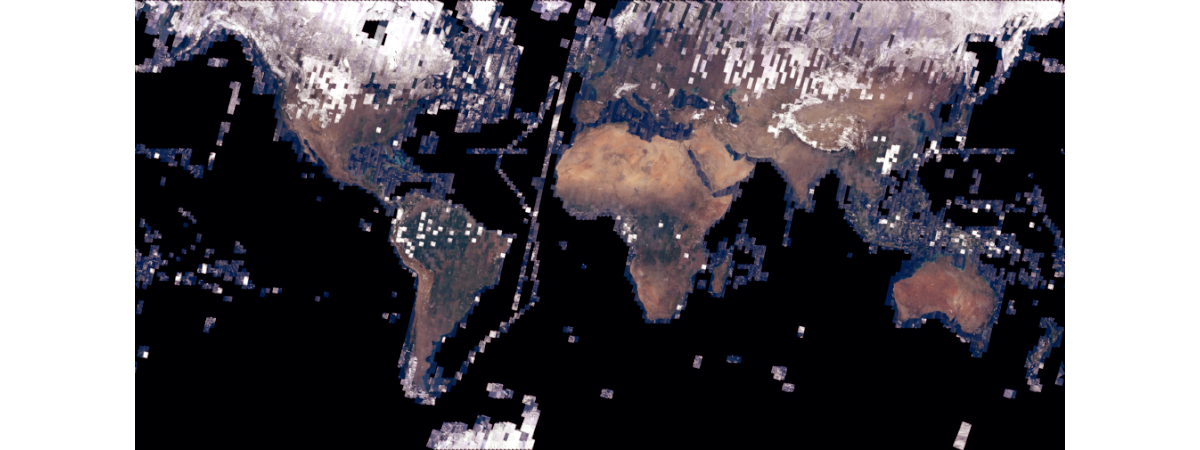

In [11]:
from arcgis.raster import ImageryLayer
item = "https://landsat2.arcgis.com/arcgis/rest/services/Landsat/PS/ImageServer"
landsatps_lyr = ImageryLayer(item)
landsatps_lyr

In [20]:
landsatps_lyr1 = ImageryLayer(item)

In [12]:
from arcgis.geocoding import geocode
area = geocode('Chennai, Tamil Nadu', out_sr=landsatps_lyr.properties.spatialReference)[0]

In [17]:
# Get the extent for chennai
area['extent']

{'xmin': 8919304.994185047,
 'ymin': 1451123.8733747886,
 'xmax': 8954704.59225731,
 'ymax': 1487466.9650214785}

In [23]:
#Set extent variable with spatial reference
chennai_extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                  'xmin': 8919304.994185047,
                  'ymin': 1451123.8733747886,
                  'xmax': 8954704.59225731,
                  'ymax': 1487466.9650214785}

chennai_extent1 = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                  'xmin': 8933118.07320012,
                  'ymin': 1460468.8360531,
                  'xmax': 8937116.66930942,
                  'ymax': 1463069.07100237}

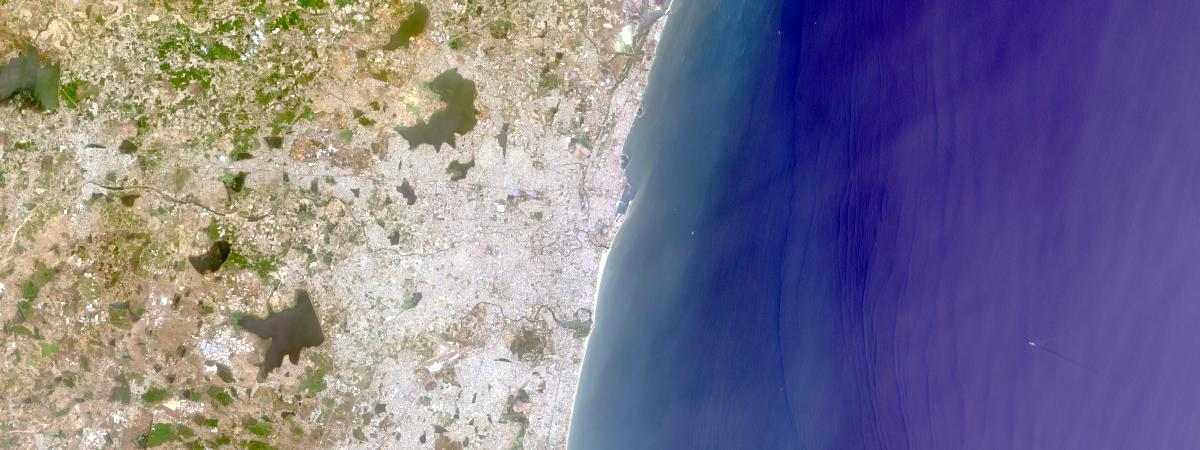

In [64]:
#Setting the image extent to area defined above
landsatps_lyr.extent = chennai_extent

landsatps_lyr

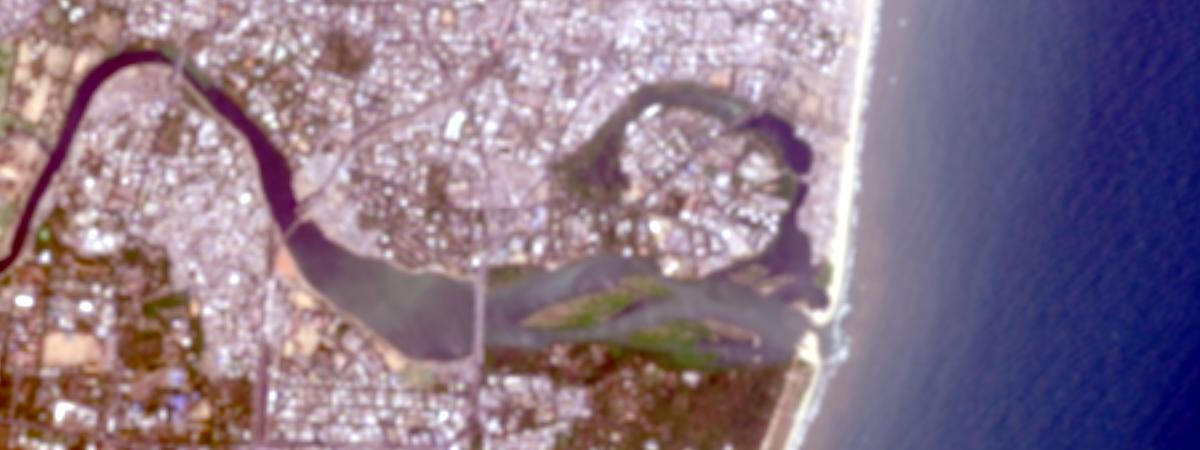

In [24]:
#Setting the image extent to area defined above
landsatps_lyr1.extent = chennai_extent1

landsatps_lyr1

In [65]:
# To set analysis extent
arcgis.env.verbose = True
arcgis.env.analysis_extent = chennai_extent

In [25]:
# To set analysis extent
arcgis.env.verbose = True
arcgis.env.analysis_extent = chennai_extent1

In [66]:
chennai_selected = landsatps_lyr.filter_by(where="(Category = 1) AND (CloudCover <=0.10) AND (WRS_Row = 51) AND (WRS_Path = 142)", 
                   geometry=arcgis.geometry.filters.intersects(landsatps_lyr.extent))

In [26]:
chennai_selected1 = landsatps_lyr1.filter_by(where="(Category = 1) AND (CloudCover <=0.10) AND (WRS_Row = 51) AND (WRS_Path = 142)", 
                   geometry=arcgis.geometry.filters.intersects(landsatps_lyr1.extent))

In [67]:
chennai_fs = chennai_selected.query(out_fields="AcquisitionDate, GroupName, Best, CloudCover, WRS_Row, Month, Name", 
              return_geometry=True,
              return_distinct_values=False,
              order_by_fields="AcquisitionDate")

In [27]:
chennai_fs1 = chennai_selected1.query(out_fields="AcquisitionDate, GroupName, Best, CloudCover, WRS_Row, Month, Name", 
              return_geometry=True,
              return_distinct_values=False,
              order_by_fields="AcquisitionDate")

In [75]:
ch_df = chennai_fs.sdf
#ch_df.tail(12)

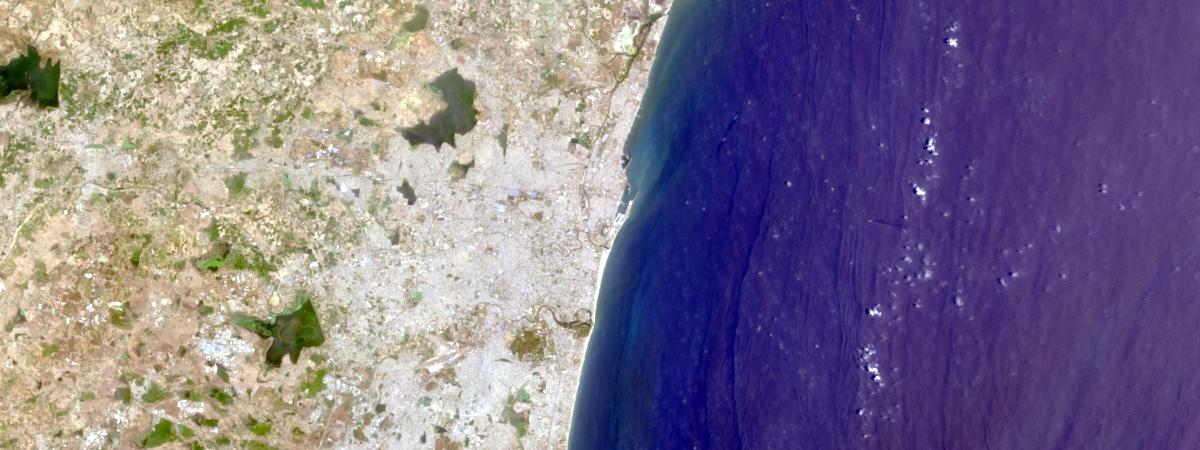

In [70]:
ch_filtered_layer = landsatps_lyr.filter_by('OBJECTID=68568')
ch_filtered_layer

In [28]:
ch_df1 = chennai_fs1.sdf
ch_df1.tail(12)

,OBJECTID,AcquisitionDate,GroupName,Best,CloudCover,WRS_Row,Month,Name,SHAPE
28,618555,2019-04-16 04:57:58,LC08_L1TP_142051_20190416_20200829_02_T1_MTL,30858051,0.0395,51,4,LC08_L1TP_142051_20190416_20200829_02_T1,"{""rings"": [[[9057101.504999999, 1537883.114700..."
29,68563,2020-01-13 04:58:42,LC08_L1TP_142051_20200113_20200823_02_T1_MTL,23858051,0.0922,51,1,LC08_L1TP_142051_20200113_20200823_02_T1,"{""rings"": [[[9059454.910100002, 1537879.163100..."
30,68565,2020-02-14 04:58:33,LC08_L1TP_142051_20200214_20200823_02_T1_MTL,15858051,0.0103,51,2,LC08_L1TP_142051_20200214_20200823_02_T1,"{""rings"": [[[9058957.3169, 1537920.4459999986]..."
31,68567,2020-03-17 04:58:21,LC08_L1TP_142051_20200317_20200822_02_T1_MTL,16858051,0.0361,51,3,LC08_L1TP_142051_20200317_20200822_02_T1,"{""rings"": [[[9057484.631299999, 1537923.120400..."
32,68568,2020-04-02 04:58:12,LC08_L1TP_142051_20200402_20200822_02_T1_MTL,11858051,0.0029,51,4,LC08_L1TP_142051_20200402_20200822_02_T1,"{""rings"": [[[9057910.959800001, 1537999.374699..."
33,68569,2020-04-18 04:58:05,LC08_L1TP_142051_20200418_20200822_02_T1_MTL,18858051,0.0659,51,4,LC08_L1TP_142051_20200418_20200822_02_T1,"{""rings"": [[[9056129.684999999, 1538002.376600..."
34,1019363,2021-02-16 04:58:35,LC08_L1TP_142051_20210216_20210301_02_T1_MTL,7858051,0.0265,51,2,LC08_L1TP_142051_20210216_20210301_02_T1,"{""rings"": [[[9058647.109299999, 1537879.162700..."
35,1019364,2021-03-04 04:58:28,LC08_L1TP_142051_20210304_20210312_02_T1_MTL,5858051,0.0254,51,3,LC08_L1TP_142051_20210304_20210312_02_T1,"{""rings"": [[[9058717.2119, 1537880.6404], [901..."
36,1019366,2021-04-05 04:58:16,LC08_L1TP_142051_20210405_20210409_02_T1_MTL,8858051,0.0887,51,4,LC08_L1TP_142051_20210405_20210409_02_T1,"{""rings"": [[[9056865.8746, 1538000.9549999982]..."
37,3004854,2021-12-25 04:58:48,LC09_L1TP_142051_20211225_20220121_02_T1_MTL,1858051,0.0073,51,12,LC09_L1TP_142051_20211225_20220121_02_T1,"{""rings"": [[[9057433.393800002, 1537838.288400..."


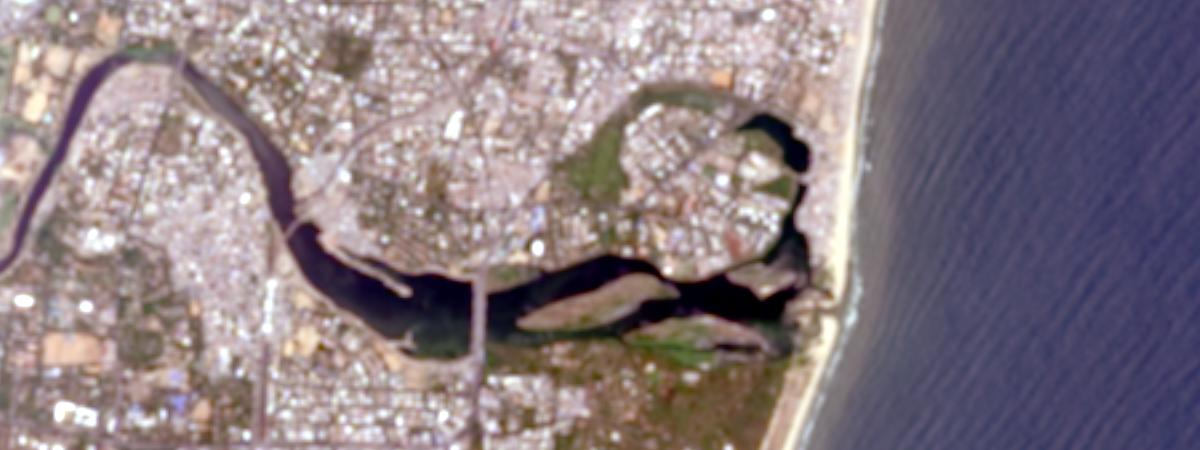

In [56]:
ch_filtered_layer1 = landsatps_lyr1.filter_by('OBJECTID=68569')
ch_filtered_layer1

In [ ]:
import urllib3
urllib3.disable_warnings()
import certifi
http = urllib3.PoolManager(cert_reqs='CERT_NONE', ca_certs=certifi.where())

In [71]:
ch_classifier_definition = train_classifier(input_raster=ch_filtered_layer, 
                                         input_training_sample_json=chennai_trainingset_json, 
                                         classifier_parameters={"method":"svm", 
                                                                "params":{"maxSampleClass":500}},
                                         gis=gis)

Submitted.
Executing...
Start Time: Monday, April 18, 2022 10:33:44 AM
Prepare training feature.
Training...
Training completed.
Succeeded at Monday, April 18, 2022 10:34:57 AM (Elapsed Time: 1 minutes 13 seconds)
TrainClassifier GP Job: j7c2518cc9107426aafd6e4f9c8f09894 finished successfully.


In [58]:
ch_classifier_definition1 = train_classifier(input_raster=ch_filtered_layer1, 
                                         input_training_sample_json=chennai_trainingsets1_json, 
                                         classifier_parameters={"method":"svm", 
                                                                "params":{"maxSampleClass":500}},
                                         gis=gis)

Submitted.
Executing...
Start Time: Monday, April 18, 2022 10:26:02 AM
Raster Analytics helper service: https://pythonapi.playground.esri.com/ra
Running on ArcGIS Image Server.
Prepare training feature.
Training...
TrainClassifier GP Job: j686bb7209727473ab4ecda9fc4332bd9 finished successfully.


In [47]:
ch_classifier_definition1["Definitions"][0]["Classes"]

[{'ClassValue': 10,
  'ClassName': 'Water',
  'Red': 84,
  'Green': 117,
  'Blue': 168},
 {'ClassValue': 20,
  'ClassName': 'Developed',
  'Red': 232,
  'Green': 209,
  'Blue': 209},
 {'ClassValue': 30,
  'ClassName': 'Barren',
  'Red': 210,
  'Green': 205,
  'Blue': 192},
 {'ClassValue': 80,
  'ClassName': 'Planted / Cultivated',
  'Red': 251,
  'Green': 246,
  'Blue': 93}]

In [72]:
from arcgis.raster.analytics import classify

classified_output = classify(input_raster=ch_filtered_layer,
                             input_classifier_definition=ch_classifier_definition)
classified_output

Submitted.
Executing...
Start Time: Monday, April 18, 2022 10:38:41 AM
Image service {'name': 'Classify_FSDHIY', 'serviceUrl': 'https://pythonapi.playground.esri.com/ra/rest/services/Hosted/Classify_FSDHIY/ImageServer'} already existed.
Classifying...
Finished
Updating service with data store URI.
Getting image service info...
Updating service: https://pythonapi.playground.esri.com/ra/admin/services/Hosted/Classify_FSDHIY.ImageServer/edit
Update item service: https://pythonapi.playground.esri.com/ra/admin/services/Hosted/Classify_FSDHIY.ImageServer successfully.
Portal item refreshed.
Succeeded at Monday, April 18, 2022 10:39:22 AM (Elapsed Time: 41.10 seconds)
Classify GP Job: j3168a6204fc6401e82bc92a181f560f1 finished successfully.


<Item title:"Classify_FSDHIY" type:Imagery Layer owner:arcgis_python>

In [59]:
from arcgis.raster.analytics import classify

classified_output1 = classify(input_raster=ch_filtered_layer1,
                             input_classifier_definition=ch_classifier_definition1)
classified_output1

Submitted.
Executing...
Start Time: Monday, April 18, 2022 10:27:20 AM
Image service {'name': 'Classify_1ZP33M', 'serviceUrl': 'https://pythonapi.playground.esri.com/ra/rest/services/Hosted/Classify_1ZP33M/ImageServer'} already existed.
Classifying...
Finished
Updating service with data store URI.
Getting image service info...
Updating service: https://pythonapi.playground.esri.com/ra/admin/services/Hosted/Classify_1ZP33M.ImageServer/edit
Succeeded at Monday, April 18, 2022 10:27:28 AM (Elapsed Time: 7.39 seconds)
Classify GP Job: jd3245593a16e45a1804e074b7c461911 finished successfully.


<Item title:"Classify_1ZP33M" type:Imagery Layer owner:arcgis_python>

MapView(layout=Layout(height='400px', width='100%'))


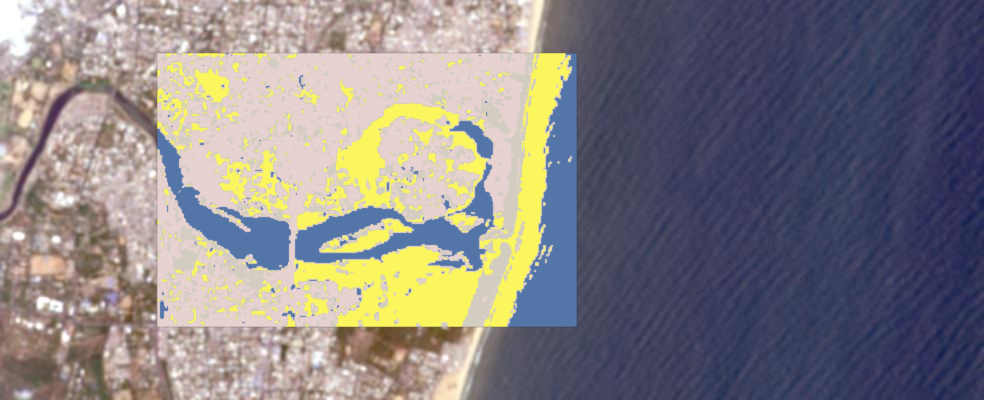

In [49]:
m2 = gis.map('Chennai,Tamil Nadu') # shows the Landsat layer
m2.extent = chennai_extent1
m2

In [60]:
m2.add_layer(ch_filtered_layer1)
m2.add_layer(classified_output1.layers[0])

In [51]:
m2.legend = True

In [73]:
m3 = gis.map('Chennai,Tamil Nadu') # shows the Landsat layer
m3.extent = chennai_extent
m3

MapView(layout=Layout(height='400px', width='100%'))

In [74]:
m3.add_layer(ch_filtered_layer)
m3.add_layer(classified_output.layers[0])
m3.legend=True

In [78]:
Chennai_Large1 = classified_output1.layers[0]

In [80]:
from IPython.display import Image

classified_output1.layers[0]

Chennai_Large1_Img = Chennai_Large1.export_image(chennai_extent1, size=[1200,450], f='image', save_folder=r'E:\WWF\Wildlife_API_ShpExpt', save_file='Chennai_Large1.jpg')

In [81]:
Chennai_Large1_Img

'E:\\WWF\\Wildlife_API_ShpExpt\\Chennai_Large1.jpg'


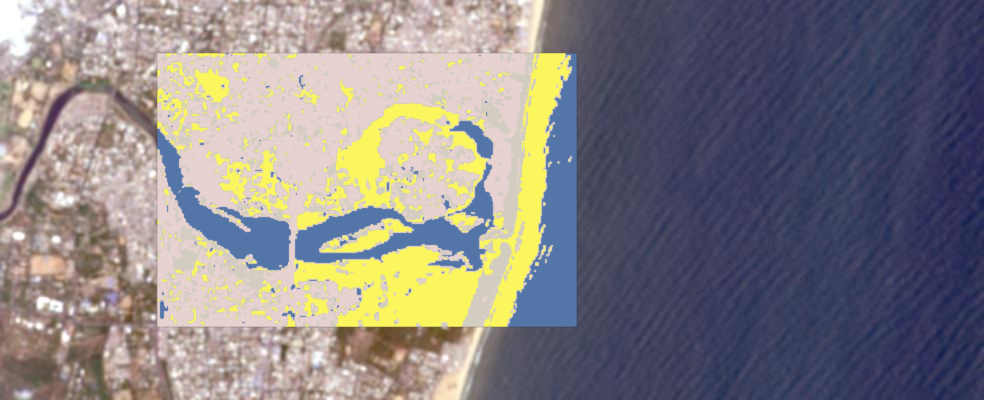

In [82]:
m2.take_screenshot(file_path=r'E:\WWF\Wildlife_API_ShpExpt\Chennai_Large1.png')